In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR ='/media/sangeet/Stuff/DC Shares/Courses and Tutorials/ML DL AI/Datasets/DogsVsCats-Kaggle/train'
TEST_DIR='/media/sangeet/Stuff/DC Shares/Courses and Tutorials/ML DL AI/Datasets/DogsVsCats-Kaggle/test'
IMG_SIZE=50
LR = 1e-3

MODEL_NAME='dogsvscats-{}-{}.model'.format(LR,'6conv-basic')

In [3]:
def label_img(img):
    word_label=img.split('.')[0]
    if word_label =='cat' : return [1,0]
    elif word_label == 'dog' : return [0,1]

In [4]:
def create_train_data():
    training_data =[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),img_num])
    np.save('test_data.npy',testing_data)
    return testing_data

In [74]:
def test_image(testpath):
    test_image = cv2.resize(cv2.imread(testpath,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
    plt.imshow(test_image,cmap='gray')
    plt.show()
    data=test_image.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out=model.predict([data])[0]
    np.argmax(model_out)
    if np.argmax(model_out) == 1: print('I think that is a dog !!')
    else:print('That looks like a cat !!')
    return None

In [6]:
train_data=create_train_data()

100%|██████████| 25000/25000 [01:33<00:00, 267.59it/s]


In [7]:
import tensorflow as tf

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [8]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

INFO:tensorflow:Restoring parameters from /media/sangeet/Stuff/gitrepo/Inter IIT/DogsVsCats/dogsvscats-0.001-6conv-basic.model
model loaded!


In [9]:
train = train_data[:-500]
test = train_data[-500:]

In [10]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]


test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


In [20]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 5744  | total loss: 0.23870 | time: 24.698s
| Adam | epoch: 006 | loss: 0.23870 - acc: 0.8985 -- iter: 24448/24500
Training Step: 5745  | total loss: 0.23059 | time: 25.765s
| Adam | epoch: 006 | loss: 0.23059 - acc: 0.9040 | val_loss: 0.47580 - val_acc: 0.8260 -- iter: 24500/24500
--


In [12]:
model.save(MODEL_NAME)

INFO:tensorflow:/media/sangeet/Stuff/gitrepo/Inter IIT/DogsVsCats/dogsvscats-0.001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


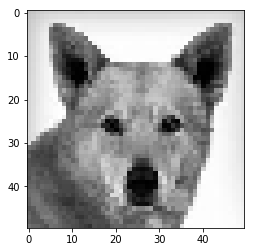

I think that is a dog !!


In [75]:
test_image('./image/dog2.jpg')

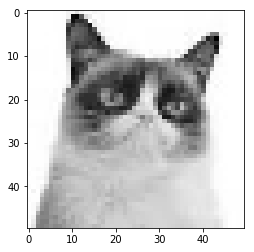

That looks like a cat !!


In [76]:
test_image('./image/th.jpg')